# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
cities

Number of cities in the list: 609


['ushuaia',
 'upernavik',
 'tilichiki',
 'mataura',
 'morondava',
 'praia da vitoria',
 'rikitea',
 'umzimvubu',
 'tibati',
 'bredasdorp',
 'puerto ayora',
 'huarmey',
 'seoul',
 'saint-philippe',
 'belushya guba',
 'busselton',
 'bluff',
 'dzoragyukh',
 'tsihombe',
 'punta arenas',
 'khvoynaya',
 'cidreira',
 'jamestown',
 'hvolsvollur',
 'lefka',
 'qaanaaq',
 'chuy',
 'basoko',
 'coihueco',
 'luderitz',
 'isangel',
 'caraubas',
 'port elizabeth',
 'zhanaozen',
 'husavik',
 'cherskiy',
 'palmer',
 'hobart',
 'esperance',
 'constitucion',
 'daru',
 'victoria',
 'vaitupu',
 'kaitangata',
 'meyungs',
 'saint anthony',
 'kirchhain',
 'cape town',
 'san patricio',
 'nikolskoye',
 'castro',
 'tuktoyaktuk',
 'evensk',
 'mys shmidta',
 'swan hill',
 'arraial do cabo',
 'albany',
 'hithadhoo',
 'yekaterinoslavka',
 'atbasar',
 'kangaatsiaq',
 'yellowknife',
 'lebu',
 'klaksvik',
 'xichang',
 'nizhneyansk',
 'attawapiskat',
 'chokurdakh',
 'kavieng',
 'coquimbo',
 'sentyabrskiy',
 'marsaxlokk',

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [21]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q=" 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = city.title() + "&appid=" + weather_api_key
       
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response_json = requests.get(url + city_url).json()
        #json.dumps(response_json, indent=4, sort_keys=True)
        #city_weather = response_json["weather"]
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response_json["coord"]["lat"]
        city_lng = response_json["coord"]["lon"]
        city_max_temp = response_json["main"]["temp_max"]
        city_humidity = response_json["main"]["humidity"]
        city_clouds = response_json["clouds"]["all"]
        city_wind = response_json["wind"]["speed"]
        city_country = response_json["sys"]["country"]
        city_date = response_json["dt"]
      

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | upernavik
Processing Record 3 of Set 1 | tilichiki
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | morondava
Processing Record 6 of Set 1 | praia da vitoria
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 9 of Set 1 | tibati
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | huarmey
Processing Record 13 of Set 1 | seoul
Processing Record 14 of Set 1 | saint-philippe
Processing Record 15 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | dzoragyukh
City not found. Skipping...
Processing Record 19 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 20 of Set 1 | punta 

Processing Record 34 of Set 4 | roma
Processing Record 35 of Set 4 | jurm
Processing Record 36 of Set 4 | carnarvon
Processing Record 37 of Set 4 | lalmohan
Processing Record 38 of Set 4 | westport
Processing Record 39 of Set 4 | codrington
Processing Record 40 of Set 4 | lhokseumawe
Processing Record 41 of Set 4 | sao filipe
Processing Record 42 of Set 4 | kayes
Processing Record 43 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 44 of Set 4 | varhaug
Processing Record 45 of Set 4 | kodiak
Processing Record 46 of Set 4 | ataco
Processing Record 47 of Set 4 | khatanga
Processing Record 48 of Set 4 | taltal
Processing Record 49 of Set 4 | guerrero negro
Processing Record 0 of Set 5 | souillac
Processing Record 1 of Set 5 | kamenka
Processing Record 2 of Set 5 | mahibadhoo
Processing Record 3 of Set 5 | nizhniy kuranakh
Processing Record 4 of Set 5 | grand-santi
Processing Record 5 of Set 5 | egvekinot
Processing Record 6 of Set 5 | ina
Processing Record 7 of Set 5

Processing Record 27 of Set 8 | marawi
Processing Record 28 of Set 8 | mahebourg
Processing Record 29 of Set 8 | vicente guerrero
Processing Record 30 of Set 8 | lagoa
Processing Record 31 of Set 8 | lata
Processing Record 32 of Set 8 | nantucket
Processing Record 33 of Set 8 | beringovskiy
Processing Record 34 of Set 8 | khasan
Processing Record 35 of Set 8 | isoka
Processing Record 36 of Set 8 | griffin
Processing Record 37 of Set 8 | severo-kurilsk
Processing Record 38 of Set 8 | adrar
Processing Record 39 of Set 8 | zheleznodorozhnyy
Processing Record 40 of Set 8 | bawisan
City not found. Skipping...
Processing Record 41 of Set 8 | boca do acre
Processing Record 42 of Set 8 | taonan
Processing Record 43 of Set 8 | pangkalanbuun
Processing Record 44 of Set 8 | giyon
Processing Record 45 of Set 8 | irtyshskiy
Processing Record 46 of Set 8 | sao felix do xingu
Processing Record 47 of Set 8 | malakal
Processing Record 48 of Set 8 | manaus
Processing Record 49 of Set 8 | jarjis
City not

Processing Record 15 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 16 of Set 12 | nueva guinea
Processing Record 17 of Set 12 | yaval
Processing Record 18 of Set 12 | port macquarie
Processing Record 19 of Set 12 | sokolow podlaski
Processing Record 20 of Set 12 | guia de isora
Processing Record 21 of Set 12 | nacala
Processing Record 22 of Set 12 | lac du bonnet
Processing Record 23 of Set 12 | almeirim
Processing Record 24 of Set 12 | phan rang
City not found. Skipping...
Processing Record 25 of Set 12 | saint-augustin
Processing Record 26 of Set 12 | bridlington
Processing Record 27 of Set 12 | karaul
City not found. Skipping...
Processing Record 28 of Set 12 | nurota
Processing Record 29 of Set 12 | at-bashi
Processing Record 30 of Set 12 | manavalakurichi
Processing Record 31 of Set 12 | mount gambier
Processing Record 32 of Set 12 | san cristobal
Processing Record 33 of Set 12 | gawler
Processing Record 34 of Set 12 | buala
Processing Record 35 of Set 12 | 

In [22]:
len(city_data)

558

In [25]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
City ID       558
dtype: int64

In [26]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,City ID
0,ushuaia,-54.8000,-68.3000,279.96,65,20,"{'speed': 4.12, 'deg': 230}",AR,1675136599,3833367
1,upernavik,72.7868,-56.1549,257.23,75,100,"{'speed': 3.02, 'deg': 126, 'gust': 3.02}",GL,1675136600,3418910
2,tilichiki,60.4667,166.1000,261.38,95,54,"{'speed': 1.73, 'deg': 18, 'gust': 1.71}",RU,1675136600,2120591
3,mataura,-46.1927,168.8643,303.70,34,11,"{'speed': 1.11, 'deg': 181, 'gust': 2.42}",NZ,1675136601,6201424
4,morondava,-20.2833,44.2833,299.00,86,52,"{'speed': 1.97, 'deg': 119, 'gust': 1.86}",MG,1675136601,1058381


In [27]:
# Export the City_Data into a csv

city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [28]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,City ID
City_ID,,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,279.96,65,20,"{'speed': 4.12, 'deg': 230}",AR,1675136599,3833367
1,upernavik,72.7868,-56.1549,257.23,75,100,"{'speed': 3.02, 'deg': 126, 'gust': 3.02}",GL,1675136600,3418910
2,tilichiki,60.4667,166.1000,261.38,95,54,"{'speed': 1.73, 'deg': 18, 'gust': 1.71}",RU,1675136600,2120591
3,mataura,-46.1927,168.8643,303.70,34,11,"{'speed': 1.11, 'deg': 181, 'gust': 2.42}",NZ,1675136601,6201424
4,morondava,-20.2833,44.2833,299.00,86,52,"{'speed': 1.97, 'deg': 119, 'gust': 1.86}",MG,1675136601,1058381


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

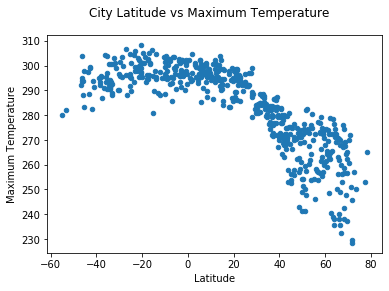

In [146]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(x="Lat",y="Max Temp",kind="scatter",marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.suptitle('City Latitude vs Maximum Temperature')
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

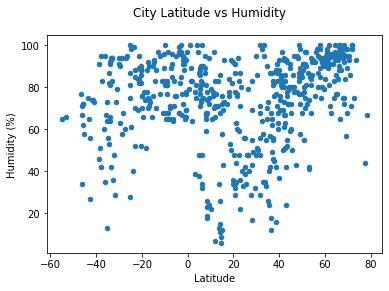

In [148]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(x="Lat",y="Humidity",kind="scatter",marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.suptitle('City Latitude vs Humidity')
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

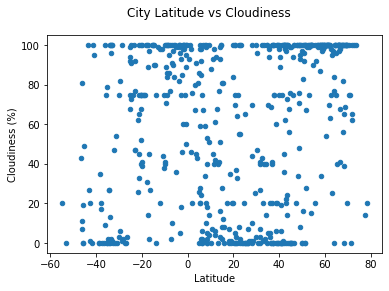

In [149]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(x="Lat",y="Cloudiness",kind="scatter",marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.suptitle('City Latitude vs Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [ ]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(x="Lat",y="Wind Speed",kind="scatter",marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.suptitle('City Latitude vs Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [128]:
# Define a function to create Linear Regression plots
from scipy import stats


In [129]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,City ID
City_ID,,,,,,,,,,
1,upernavik,72.7868,-56.1549,257.23,75,100,"{'speed': 3.02, 'deg': 126, 'gust': 3.02}",GL,1675136600,3418910
2,tilichiki,60.4667,166.1000,261.38,95,54,"{'speed': 1.73, 'deg': 18, 'gust': 1.71}",RU,1675136600,2120591
5,praia da vitoria,38.7333,-27.0667,286.29,88,20,"{'speed': 5.14, 'deg': 69, 'gust': 5.82}",PT,1675136602,3372760
7,tibati,6.4667,12.6333,291.01,32,0,"{'speed': 1.28, 'deg': 138, 'gust': 1.34}",CM,1675136603,2221530
11,seoul,37.5683,126.9778,276.93,45,75,"{'speed': 4.63, 'deg': 100}",KR,1675136292,1835848


In [130]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,City ID
City_ID,,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,279.96,65,20,"{'speed': 4.12, 'deg': 230}",AR,1675136599,3833367
3,mataura,-46.1927,168.8643,303.70,34,11,"{'speed': 1.11, 'deg': 181, 'gust': 2.42}",NZ,1675136601,6201424
4,morondava,-20.2833,44.2833,299.00,86,52,"{'speed': 1.97, 'deg': 119, 'gust': 1.86}",MG,1675136601,1058381
6,rikitea,-23.1203,-134.9692,299.58,70,47,"{'speed': 4.17, 'deg': 58, 'gust': 4.34}",PF,1675136602,4030556
8,bredasdorp,-34.5322,20.0403,290.62,87,27,"{'speed': 4.04, 'deg': 83, 'gust': 9.46}",ZA,1675136603,1015776


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7288055374808134


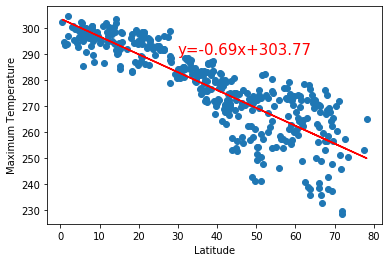

In [138]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope,intercept,rvalue,pvalue,strderr) = stats.linregress(x_values,y_values)
predicted_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")

line_eq = f"y={round(slope,2)}x+{round(intercept,2)}"
plt.annotate(line_eq,xy=(30,290),fontsize=15,color="red")

plt.plot(x_values,predicted_values,"r-")
print(f"The r-value is: {rvalue**2}")

The r-value is: 0.09995647091883303


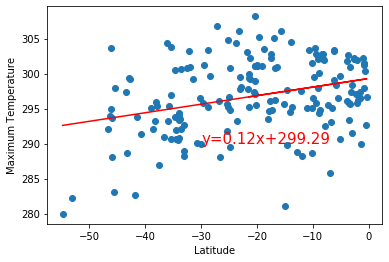

In [133]:
# Linear regression on Southern Hemisphere
x_values1 = southern_hemi_df['Lat']
y_values1 = southern_hemi_df['Max Temp']

(slope1,intercept1,rvalue1,pvalue1,strderr1) = stats.linregress(x_values1,y_values1)
predicted_values1 = x_values1 * slope1 + intercept1

plt.scatter(x_values1,y_values1)
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")

line_eq1 = f"y={round(slope1,2)}x+{round(intercept1,2)}"
plt.annotate(line_eq1,xy=(-30,290),fontsize=15,color="red")

plt.plot(x_values1,predicted_values1,"r-")
print(f"The r-value is: {rvalue1**2}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.16261626070611632


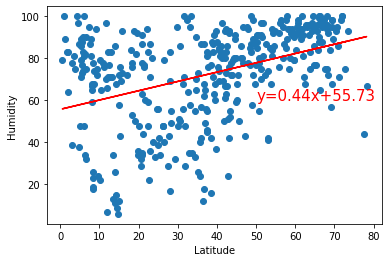

In [136]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values2 = northern_hemi_df['Humidity']

(slope2,intercept2,rvalue,pvalue2,strderr2) = stats.linregress(x_values,y_values2)
predicted_values2 = x_values * slope2 + intercept2

plt.scatter(x_values,y_values2)
plt.xlabel("Latitude")
plt.ylabel("Humidity")

line_eq2 = f"y={round(slope2,2)}x+{round(intercept2,2)}"
plt.annotate(line_eq2,xy=(50,60),fontsize=15,color="red")

plt.plot(x_values,predicted_values2,"r-")
print(f"The r-value is: {rvalue2**2}")

The r-value is: 0.12561660688651397


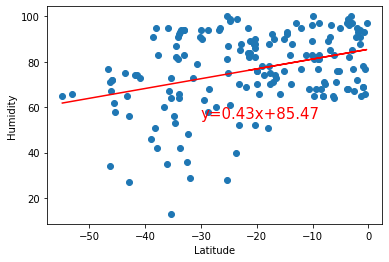

In [143]:
# Southern Hemisphere
#x_values1 = southern_hemi_df['Lat']
y_values3 = southern_hemi_df['Humidity']

(slope3,intercept3,rvalue3,pvalue3,strderr3) = stats.linregress(x_values1,y_values3)
predicted_values3 = x_values1 * slope3 + intercept3

plt.scatter(x_values1,y_values3)
plt.xlabel("Latitude")
plt.ylabel("Humidity")

line_eq3 = f"y={round(slope3,2)}x+{round(intercept3,2)}"
plt.annotate(line_eq3,xy=(-30,55),fontsize=15,color="red")

plt.plot(x_values1,predicted_values3,"r-")
print(f"The r-value is: {rvalue3**2}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.13145003278358608


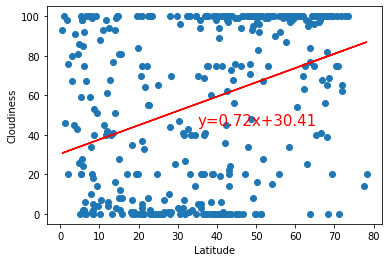

In [142]:
# Northern Hemisphere
#x_values = northern_hemi_df['Lat']
y_values4 = northern_hemi_df['Cloudiness']

(slope4,intercept4,rvalue4,pvalue4,strderr4) = stats.linregress(x_values,y_values4)
predicted_values4 = x_values * slope4 + intercept4

plt.scatter(x_values,y_values4)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

line_eq4 = f"y={round(slope4,2)}x+{round(intercept4,2)}"
plt.annotate(line_eq4,xy=(35,45),fontsize=15,color="red")

plt.plot(x_values,predicted_values4,"r-")
print(f"The r-value is: {rvalue4**2}")

The r-value is: 0.24858324313423885


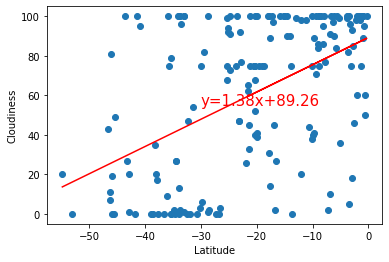

In [150]:
# Southern Hemisphere
#x_values1 = southern_hemi_df['Lat']
y_values5 = southern_hemi_df['Cloudiness']

(slope5,intercept5,rvalue5,pvalue5,strderr5) = stats.linregress(x_values1,y_values5)
predicted_values5 = x_values1 * slope5 + intercept5

plt.scatter(x_values1,y_values5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

line_eq5 = f"y={round(slope5,2)}x+{round(intercept5,2)}"
plt.annotate(line_eq5,xy=(-30,55),fontsize=15,color="red")

plt.plot(x_values1,predicted_values5,"r-")
print(f"The r-value is: {rvalue5**2}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
#x_values = northern_hemi_df['Lat']
y_values6 = northern_hemi_df['Wind Speed']

(slope6,intercept6,rvalue6,pvalue6,strderr6) = stats.linregress(x_values,y_values6)
predicted_values6 = x_values * slope6 + intercept6

plt.scatter(x_values,y_values6)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

line_eq6 = f"y={round(slope6,2)}x+{round(intercept6,2)}"
plt.annotate(line_eq6,xy=(35,65),fontsize=15,color="red")

plt.plot(x_values,predicted_values6,"r-")
print(f"The r-value is: {rvalue6**2}")

In [ ]:
# Southern Hemisphere
#x_values1 = southern_hemi_df['Lat']
y_values7 = southern_hemi_df['Wind Speed']

(slope7,intercept7,rvalue7,pvalue7,strderr7) = stats.linregress(x_values1,y_values7)
predicted_values7 = x_values1 * slope7 + intercept7

plt.scatter(x_values1,y_values7)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

line_eq7 = f"y={round(slope7,2)}x+{round(intercept7,2)}"
plt.annotate(line_eq7,xy=(-30,77),fontsize=17,color="red")

plt.plot(x_values1,predicted_values7,"r-")
print(f"The r-value is: {rvalue7**2}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE